In [266]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import curve_fit
x, a, b, c, d, e = symbols("x, a, b, c, d, e")
f = (x**2)*(b**2)*(cos(a*x+c))*d**x/e
print("Выбранная для аппроксимации функция f(x):")
f

Выбранная для аппроксимации функция f(x):


b**2*d**x*x**2*cos(a*x + c)/e

In [267]:
#массив абсцисс точек выборки
x_nodes =np.array([
1.762616021545484912e+00, 
7.954274558188359379e+00 ,
7.830614589494160782e+00 ,
6.316749546153680228e+00 ,
-9.282208287662934154e+00,
3.835151635177677321e+00 ,
-2.426381159891837669e+00,
3.702189089616130246e-01 ,
3.159029311176260180e+00 ,
-6.122995642341033218e+00,
-4.553671958668321196e+00,
4.372118672023315611e+00 ,
5.660072189180208824e+00 ,
7.006552795499906949e+00 ,
5.504897879887254319e+00 ,
-9.266713871578284412e+00,
-7.666125297342096800e+00,
5.025613989754019073e+00 ,
-5.215635676007810417e+00,
-4.903879721157064608e+00,
7.152510623395251343e+00 ,
8.995580522286054759e+00 ,
1.233737160223158824e+00 ,
-6.424389603000468796e+00,
5.405038662768005153e+00 ,
-1.523792077090107000e-01,
2.625061311270906472e+00 ,
6.789958458274117703e+00 ,
-7.792120741513848259e-01,
-4.119853385389760092e-02,
3.588222351065015303e+00 ,
3.015718282466600897e+00 ,
-4.624095225112919039e+00,
-8.653506661219644513e+00,
5.428902767171255306e+00 ,
-3.803173540070829972e-01,
-3.415871845327065337e+00,
2.128211235030352810e-01 ,
-4.727423426798864625e+00,
-3.789768999074052402e+00])
#массив ординат точек выборки
y_nodes = np.array([
-2.559485692520085398e-01,
-5.953745355969532937e+01,
 -5.823798175531754850e+01,
 -1.452170507582623848e+01,
 -3.265690823071358295e+01,
1.232340869022955943e+01,
3.191781015537770827e+00,
 1.618404375392851480e-01,
6.590203356472616569e+00,
 -1.099924868338029782e+01,
2.208038770576017029e+01,
 1.524105487814322757e+01,
3.712914840255366222e+00,
 -3.782673476904893306e+01,
 6.880442262037118617e+00,
-3.372180013245237973e+01,
 -6.862544026386180462e+01,
1.346676486043681287e+01,
 1.559008416203402625e+01,
 2.000424727434241490e+01,
 -4.249069815577094289e+01,
 -4.200062820935982444e+01,
-3.054593486216813925e-01,
 -2.321875875741405082e+01,
 8.653392009956244024e+00,
 -1.529623386714639155e-01,
 2.675406749973325393e+00,
 -3.053838650915460917e+01,
 -1.054334419815528889e+00,
 -3.679741360320712418e-02,
 1.030625438093799495e+01,
5.417878389154622276e+00,
 2.189125315893183554e+01,
-6.485211102315516030e+01,
8.248856715535817230e+00,
 -4.541538203726931400e-01,
 1.421196493331327915e+01,
 1.309179543870419571e-01,
2.141140480788692457e+01,
1.839776325998227691e+01])
max_x = 0
max_y = 0

for j in range(np.size(x_nodes)-1):
    for i in range(np.size(x_nodes)-1):
        if(x_nodes[i]>x_nodes[i+1]):
            max_x = x_nodes[i]
            x_nodes[i] = x_nodes[i+1]
            x_nodes[i+1] = max_x
            max_y = y_nodes[i]
            y_nodes[i] = y_nodes[i+1]
            y_nodes[i+1] = max_y
x_nodes #отсортированное представление массива абсцисс точек

array([-9.28220829, -9.26671387, -8.65350666, -7.6661253 , -6.4243896 ,
       -6.12299564, -5.21563568, -4.90387972, -4.72742343, -4.62409523,
       -4.55367196, -3.789769  , -3.41587185, -2.42638116, -0.77921207,
       -0.38031735, -0.15237921, -0.04119853,  0.21282112,  0.37021891,
        1.23373716,  1.76261602,  2.62506131,  3.01571828,  3.15902931,
        3.58822235,  3.83515164,  4.37211867,  5.02561399,  5.40503866,
        5.42890277,  5.50489788,  5.66007219,  6.31674955,  6.78995846,
        7.0065528 ,  7.15251062,  7.83061459,  7.95427456,  8.99558052])

In [268]:
y_nodes

array([-3.26569082e+01, -3.37218001e+01, -6.48521110e+01, -6.86254403e+01,
       -2.32187588e+01, -1.09992487e+01,  1.55900842e+01,  2.00042473e+01,
        2.14114048e+01,  2.18912532e+01,  2.20803877e+01,  1.83977633e+01,
        1.42119649e+01,  3.19178102e+00, -1.05433442e+00, -4.54153820e-01,
       -1.52962339e-01, -3.67974136e-02,  1.30917954e-01,  1.61840438e-01,
       -3.05459349e-01, -2.55948569e-01,  2.67540675e+00,  5.41787839e+00,
        6.59020336e+00,  1.03062544e+01,  1.23234087e+01,  1.52410549e+01,
        1.34667649e+01,  8.65339201e+00,  8.24885672e+00,  6.88044226e+00,
        3.71291484e+00, -1.45217051e+01, -3.05383865e+01, -3.78267348e+01,
       -4.24906982e+01, -5.82379818e+01, -5.95374536e+01, -4.20006282e+01])

In [269]:
def f_x(x_node, a_approx, b_approx, c_approx, d_approx, e_approx):
    #хотел изначально реализовать как float(f.subs([(x, x_node),...,(e,e_approx)])), но в итоге сдался
    return ((b_approx*x_node**2)*(np.sin(a_approx*x_node-c_approx*np.pi))*(d_approx**x_node)/e_approx)
f_x(x_nodes,1,1,1,1,1)

array([ 1.22421451e+01,  1.35168281e+01,  5.21971209e+01,  5.77355356e+01,
        5.80854666e+00, -5.98003074e+00, -2.38302833e+01, -2.36084768e+01,
       -2.23460065e+01, -2.12989650e+01, -2.04752958e+01, -8.67103297e+00,
       -3.16036335e+00,  3.86077326e+00,  4.26670951e-01,  5.36930404e-02,
        3.52448083e-03,  6.99072824e-05, -9.56667073e-03, -4.95917215e-02,
       -1.43646040e+00, -3.04983297e+00, -3.40321118e+00, -1.14175098e+00,
        1.73999717e-01,  5.56122344e+00,  9.40274884e+00,  1.80194292e+01,
        2.40279216e+01,  2.24821700e+01,  2.22255756e+01,  2.12751837e+01,
        1.86953651e+01, -1.33900616e+00, -2.23767428e+01, -3.24944704e+01,
       -3.90795862e+01, -6.13017851e+01, -6.29525419e+01, -3.36743384e+01])

In [270]:
n = 200
x_approx = np.linspace(x_nodes[0], x_nodes[39], n)
solution = curve_fit(f_x, x_nodes, y_nodes)[0] 
a_approx = solution[0]
b_approx = solution[1]
c_approx = solution[2]
d_approx = solution[3]
e_approx = solution[4]
print("Оптимизированные значения коэффициентов:")
print('a:',a_approx,'b:',b_approx,'c:',c_approx,'d:',d_approx, 'e:',e_approx)

Оптимизированные значения коэффициентов:
a: 0.810307769517168 b: 0.6327303794332086 c: 0.5033462928666067 d: 0.9856749140943949 e: 0.5994779812093672


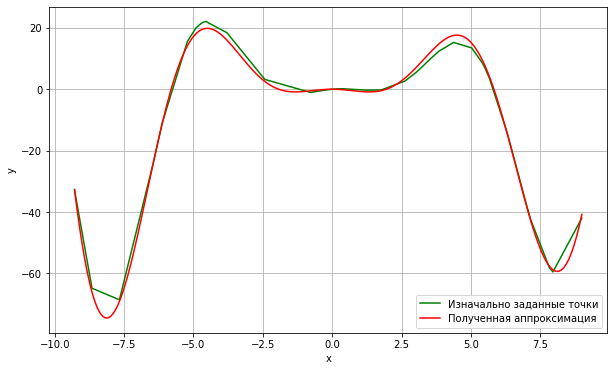

In [271]:
y_approx = f_x(x_approx,a_approx,b_approx,c_approx,d_approx,e_approx)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
axes.plot(x_nodes, y_nodes,'green', label = 'Изначально заданные точки')
axes.plot(x_approx, y_approx,'red', label = 'Полученная аппроксимация')
axes.set_xlabel("x") 
axes.set_ylabel("y")
axes.legend(loc = 'lower right')
axes.grid()
plt.show()

In [272]:
print("Функция f(x) примет следующий вид:")


Функция f(x) примет следующий вид:


In [273]:
f.subs([(a,a_approx),(b,b_approx),(c,c_approx),(d,d_approx),(e, e_approx)])

0.667827252387225*0.985674914094395**x*x**2*cos(0.810307769517168*x + 0.503346292866607)

In [274]:
max_err_x = 0
max_err_y = 0
err = 0
dist = 0
for i in range(0,len(y_nodes)):
    dist = abs(y_nodes[i] - f_x(x_nodes[i],a_approx,b_approx,c_approx,d_approx,e_approx))
    if(dist>err):
        err = dist
        max_err_x = x_nodes[i]
        max_err_y = y_nodes[i]
print('Максимальное отклонение:',err,'в точке [',format(round(max_err_x, 6)),';',format(round(max_err_y, 6)),']')

Максимальное отклонение: 2.415756885150966 в точке [ -3.789769 ; 18.397763 ]


In [275]:
s = 0
pr = 0
err = 0
for i in range(0,len(y_nodes)):
    pr = (y_nodes[i] - f_x(x_nodes[i], a_approx, b_approx,c_approx,d_approx,e_approx))**2
    s = s + pr
err = np.sqrt(s)/len(y_nodes)
print('Среднеквадратичная ошибка аппроксимации:', format(round(err, 6)))

Среднеквадратичная ошибка аппроксимации: 0.199031
